In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os, argparse, math, random
from datetime import datetime

k = 10

outputPath = "../output/knn/"

ka_test_folder = "../dataset/Test/ka"
kAA_test_folder = "../dataset/Test/kAA"
kha_test_folder = "../dataset/Test/kha"

ka_train_folder = "../dataset/Train/ka"
kAA_train_folder = "../dataset/Train/kAA"
kha_train_folder = "../dataset/Train/kha"

data = [] # training data
dataLen = []
testData = []
testLen = []
dtwMat = []
confusionMat = []

In [7]:
def fileHandle(fileName):
    wholeData = []
    file = open(fileName)
    for line in file:
        teLine = line.rstrip('\n ').split(' ')
        nLine = [float(i) for i in teLine]
        nLine = np.array(nLine)
        wholeData.append(nLine)
    file.close()
    return wholeData

# Reading all the example sets in a folder\n",
def readFolder(folder):
    data = []
    count = 0
    for root, dirs, files in os.walk(folder):
        for f in files:
#             print("Reading: ",f)
            path = os.path.relpath(os.path.join(root, f), ".")
    #         target = os.path.relpath(os.path.join(root, os.path.splitext(f)[0]))
            data.append(fileHandle(path))
            count += 1
    print(count," files read in folder ",folder)
    return data

# Reading all the training data
data.append(readFolder(ka_train_folder))
dataLen.append(len(data[0]))
data.append(readFolder(kAA_train_folder))
dataLen.append(len(data[1]))
data.append(readFolder(kha_train_folder))
dataLen.append(len(data[2]))

testData.append(readFolder(ka_test_folder))
testLen.append(len(testData[0]))
testData.append(readFolder(kAA_test_folder))
testLen.append(len(testData[1]))
testData.append(readFolder(kha_test_folder))
testLen.append(len(testData[2]))

383  files read in folder  ../dataset/Train/ka
510  files read in folder  ../dataset/Train/kAA
61  files read in folder  ../dataset/Train/kha
96  files read in folder  ../dataset/Test/ka
127  files read in folder  ../dataset/Test/kAA
15  files read in folder  ../dataset/Test/kha


In [8]:
# DTW
def dtw(vector1, vector2):
    tm = len(vector1)
    tn = len(vector2)
    
#     matrix = [[0 for x in range(tn)] for y in range(tm)]
    matrix = np.zeros(shape=(tm,tn), dtype=np.float64)
    for i in range(tm):
        matrix[i][0] = float("inf")
    for i in range(tn):
        matrix[0][i] = float("inf")
    
    matrix[0][0] = 0
    
    for i in range(tm):
        for j in range(tn):
            cost = np.linalg.norm(vector1[i] - vector2[j])
            cost *= cost  
            matrix[i][j] = cost + min(matrix[i-1][j-1], min(matrix[i-1][j], matrix[i][j-1]))
#     print("matrix: ",matrix)
    ans = (matrix[tm-1][tn-1])/(tm*tn)
#     print("DTW value: ",ans)
    return ans

def createDtwArray(classIndex, pointIndex):
    test = testData[classIndex][pointIndex]
    dataSize = len(data[0])+len(data[1])+len(data[2])
#     print("data size: ",dataSize)
    dtwArray = np.zeros(shape=(dataSize,2), dtype=np.float64)
#     print("array: ",dtwArray)
    
    count = 0
    
    for i in range(len(data[0])):
        dtwArray[count,0] = dtw(test,data[0][i])
        dtwArray[count,1] = 0
        count += 1
    for i in range(len(data[1])):
        dtwArray[count,0] = dtw(test,data[1][i])
        dtwArray[count,1] = 1
        count += 1
    for i in range(len(data[2])):
        dtwArray[count,0] = dtw(test,data[2][i])
        dtwArray[count,1] = 2
        count += 1
        
    dtwArray = dtwArray[np.argsort(dtwArray[:, 0])]
    return dtwArray

def createDtwMat():
    for classIndex in range(3):
        count = 0
        dtwMatrix = []
        for dataPoint in range(testLen[classIndex]):
            print("DTW Array for class: ",classIndex," point no: ",count)
            dtwMatrix.append(createDtwArray(classIndex, dataPoint))
            count += 1
        dtwMat.append(dtwMatrix)
    return

createDtwMat()

DTW Array for class:  0  point no:  0
DTW Array for class:  0  point no:  1
DTW Array for class:  0  point no:  2
DTW Array for class:  0  point no:  3
DTW Array for class:  0  point no:  4
DTW Array for class:  0  point no:  5
DTW Array for class:  0  point no:  6
DTW Array for class:  0  point no:  7
DTW Array for class:  0  point no:  8
DTW Array for class:  0  point no:  9
DTW Array for class:  0  point no:  10
DTW Array for class:  0  point no:  11
DTW Array for class:  0  point no:  12
DTW Array for class:  0  point no:  13
DTW Array for class:  0  point no:  14
DTW Array for class:  0  point no:  15
DTW Array for class:  0  point no:  16
DTW Array for class:  0  point no:  17
DTW Array for class:  0  point no:  18
DTW Array for class:  0  point no:  19
DTW Array for class:  0  point no:  20
DTW Array for class:  0  point no:  21
DTW Array for class:  0  point no:  22
DTW Array for class:  0  point no:  23
DTW Array for class:  0  point no:  24
DTW Array for class:  0  point no: 

DTW Array for class:  1  point no:  115
DTW Array for class:  1  point no:  116
DTW Array for class:  1  point no:  117
DTW Array for class:  1  point no:  118
DTW Array for class:  1  point no:  119
DTW Array for class:  1  point no:  120
DTW Array for class:  1  point no:  121
DTW Array for class:  1  point no:  122
DTW Array for class:  1  point no:  123
DTW Array for class:  1  point no:  124
DTW Array for class:  1  point no:  125
DTW Array for class:  1  point no:  126
DTW Array for class:  2  point no:  0
DTW Array for class:  2  point no:  1
DTW Array for class:  2  point no:  2
DTW Array for class:  2  point no:  3
DTW Array for class:  2  point no:  4
DTW Array for class:  2  point no:  5
DTW Array for class:  2  point no:  6
DTW Array for class:  2  point no:  7
DTW Array for class:  2  point no:  8
DTW Array for class:  2  point no:  9
DTW Array for class:  2  point no:  10
DTW Array for class:  2  point no:  11
DTW Array for class:  2  point no:  12
DTW Array for class:  2

In [9]:
def knn(classIndex, pointIndex):
    dtwArray = dtwMat[classIndex][pointIndex]
    freq = np.zeros(3)
    
    for i in range(k):
        freq[int(dtwArray[i,1])] += 1
        
    ans = np.argmax(freq)
    return ans

def classifySet(classIndex):
    decision = np.zeros(3)
    
    count = 0
    for i in range(testLen[classIndex]):
#         print("Processing test set no: ",count)
        count += 1
        classDecided = knn(classIndex, i)
#         print("Class decided: ",classDecided)
        decision[classDecided] += 1
#         break
    confusionMat.append(decision)
    return

In [10]:
confusionMat = []
print("confusing ka")
classifySet(0)
print("confusing kAA")
classifySet(1)
print("confusing kha")
classifySet(2)
print("Confusion Matrix")
print(confusionMat)

confusing ka
confusing kAA
confusing kha
Confusion Matrix
[array([50., 46.,  0.]), array([ 16., 111.,   0.]), array([ 1., 14.,  0.])]


In [13]:
def plotGraph(name, xVal, yVal, xLabel="", yLabel="",filename="acc"):
    plt.plot(xVal, yVal)
    plt.title(name)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
#     plt.show()
    plt.savefig(outputPath+filename+".jpg")

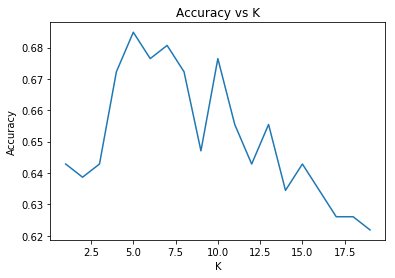

In [14]:
k = 1

accuracyVect = []
xValues = []
for i in range(1,20):
    k = i
    confusionMat = []
    classifySet(0)
    classifySet(1)
    classifySet(2)
    accuracy = confusionMat[0][0] + confusionMat[1][1] + confusionMat[2][2] 
    accuracy /= (testLen[0]+testLen[1]+testLen[2])
    accuracyVect.append(accuracy)
    xValues.append(k)
plotGraph("Accuracy vs K", xValues, accuracyVect,"K","Accuracy","accuarcyK")